In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
temp_celsius = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
temp_fahrenheit = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
temp_celsius = torch.tensor(temp_celsius)
temp_fahrenheit = torch.tensor(temp_fahrenheit)

Problem - 1a

In [3]:
def temperature_quadratic(input_temp, weight_linear, weight_quad, bias):
    return weight_quad * input_temp**2 + weight_linear * input_temp + bias

In [4]:
def calculate_mse(predicted_values, actual_values):
    error_squared = (predicted_values - actual_values)**2
    return error_squared.mean()

In [5]:
def optimize_parameters(total_iterations, optimization_method, model_parameters, input_data, target_values):
    for iteration in range(1, total_iterations + 1):
        predicted_output = temperature_quadratic(input_data, *model_parameters)
        error_value = calculate_mse(predicted_output, target_values)
        optimization_method.zero_grad()
        error_value.backward()
        optimization_method.step()
        if iteration <= 1 or iteration % 500 == 0:
            print(f"Iteration {iteration}, error {error_value.item():.4f}")
    return model_parameters

In [6]:
import torch.optim as optimization_tools
dir(optimization_tools)

['ASGD',
 'Adadelta',
 'Adafactor',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_adafactor',
 '_functional',
 'lr_scheduler',
 'swa_utils']

Problem - 1b

In [7]:
normalized_input = 0.1 * temp_fahrenheit
model_coefficients = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
step_size = 0.1
optimizer = optimization_tools.Adam([model_coefficients], lr=step_size)

optimize_parameters(
    total_iterations=5000,
    optimization_method=optimizer,
    model_parameters=model_coefficients,
    input_data=normalized_input,
    target_values=temp_celsius)

Iteration 1, error 675.7944
Iteration 500, error 2.7825
Iteration 1000, error 2.4860
Iteration 1500, error 2.2615
Iteration 2000, error 2.1441
Iteration 2500, error 2.1019
Iteration 3000, error 2.0921
Iteration 3500, error 2.0908
Iteration 4000, error 2.0907
Iteration 4500, error 2.0907
Iteration 5000, error 2.0907


tensor([  2.4760,   0.2830, -10.6496], requires_grad=True)

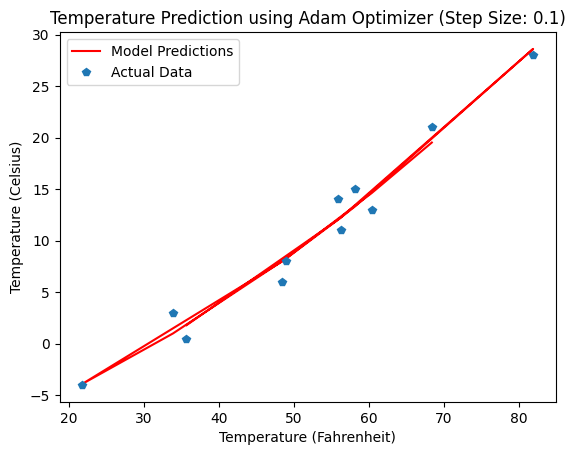

In [8]:
predicted_temps = temperature_quadratic(normalized_input, *model_coefficients)

plt.figure()
# Configure axis labels
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Plot model predictions as a continuous line
plt.plot(temp_fahrenheit.numpy(), 
         predicted_temps.detach().numpy(), 
         color='red', 
         label='Model Predictions')

# Plot actual temperature data points
plt.plot(temp_fahrenheit.numpy(), 
         temp_celsius.numpy(), 
         'p', 
         label='Actual Data')

plt.title("Temperature Prediction using Adam Optimizer (Step Size: 0.1)")

# Display legend
plt.legend()

# Render the plot
plt.show()

In [9]:
scaled_temperatures = 0.1 * temp_fahrenheit
initial_parameters = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
alpha_rate = 0.01
parameter_updater = optimization_tools.Adam([initial_parameters], lr=alpha_rate)

optimize_parameters(
    total_iterations=5000,
    optimization_method=parameter_updater,
    model_parameters=initial_parameters,
    input_data=scaled_temperatures,
    target_values=temp_celsius)

Iteration 1, error 675.7944
Iteration 500, error 6.1112
Iteration 1000, error 3.9368
Iteration 1500, error 3.1178
Iteration 2000, error 2.9318
Iteration 2500, error 2.8713
Iteration 3000, error 2.8129
Iteration 3500, error 2.7441
Iteration 4000, error 2.6647
Iteration 4500, error 2.5764
Iteration 5000, error 2.4825


tensor([ 0.4768,  0.4673, -5.6706], requires_grad=True)

In [10]:
scaled_temperatures.numpy()

array([3.5700002, 5.59     , 5.82     , 8.190001 , 5.63     , 4.8900003,
       3.39     , 2.18     , 4.84     , 6.0400004, 6.84     ],
      dtype=float32)

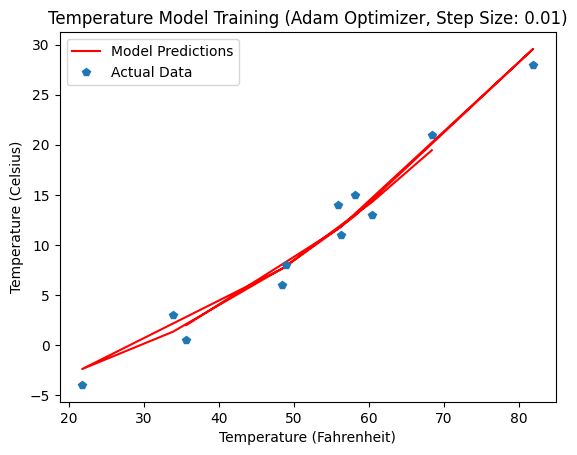

In [11]:
forecasted_values = temperature_quadratic(scaled_temperatures, *initial_parameters)

plt.figure()
# Define axis labels
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Visualize model predictions
plt.plot(temp_fahrenheit.numpy(), 
         forecasted_values.detach().numpy(), 
         color='red', 
         label='Model Predictions')

# Visualize actual measurements
plt.plot(temp_fahrenheit.numpy(), 
         temp_celsius.numpy(), 
         'p', 
         label='Actual Data')

plt.title("Temperature Model Training (Adam Optimizer, Step Size: 0.01)")

# Include data labels
plt.legend()

# Display visualization
plt.show()

In [12]:
input_scaled = 0.1 * temp_fahrenheit
model_weights = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
training_rate = 0.001
weight_optimizer = optimization_tools.Adam([model_weights], lr=training_rate)

optimize_parameters(
    total_iterations=5000,
    optimization_method=weight_optimizer,
    model_parameters=model_weights,
    input_data=input_scaled,
    target_values=temp_celsius)

Iteration 1, error 675.7944
Iteration 500, error 103.7950
Iteration 1000, error 13.0185
Iteration 1500, error 8.0649
Iteration 2000, error 7.6890
Iteration 2500, error 7.2952
Iteration 3000, error 6.8309
Iteration 3500, error 6.3062
Iteration 4000, error 5.7396
Iteration 4500, error 5.1592
Iteration 5000, error 4.6001


tensor([-0.0524,  0.4484, -1.7755], requires_grad=True)

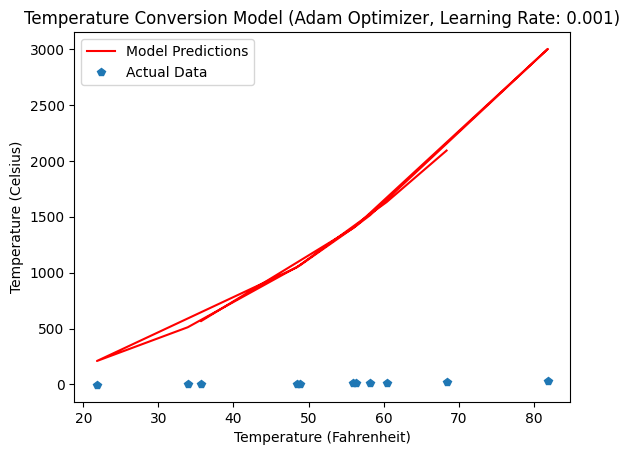

In [13]:
model_output = temperature_quadratic(temp_fahrenheit, *model_weights)

plt.figure()
# Configure visualization axes
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Generate prediction curve
plt.plot(temp_fahrenheit.numpy(), 
         model_output.detach().numpy(), 
         color='red', 
         label='Model Predictions')

# Plot observed data points
plt.plot(temp_fahrenheit.numpy(), 
         temp_celsius.numpy(), 
         'p', 
         label='Actual Data')

plt.title("Temperature Conversion Model (Adam Optimizer, Learning Rate: 0.001)")

# Add descriptive labels
plt.legend()

# Render visualization
plt.show()

In [14]:
normalized_temps = 0.1 * temp_fahrenheit
weight_params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_step = 0.0001
gradient_optimizer = optimization_tools.Adam([weight_params], lr=learning_step)

optimize_parameters(
    total_iterations=5000,
    optimization_method=gradient_optimizer,
    model_parameters=weight_params,
    input_data=normalized_temps,
    target_values=temp_celsius)

Iteration 1, error 675.7944
Iteration 500, error 578.2527
Iteration 1000, error 491.2365
Iteration 1500, error 413.8677
Iteration 2000, error 345.2539
Iteration 2500, error 284.6672
Iteration 3000, error 231.5106
Iteration 3500, error 185.2833
Iteration 4000, error 145.5521
Iteration 4500, error 111.9216
Iteration 5000, error 84.0093


tensor([ 0.5698,  0.5721, -0.4337], requires_grad=True)

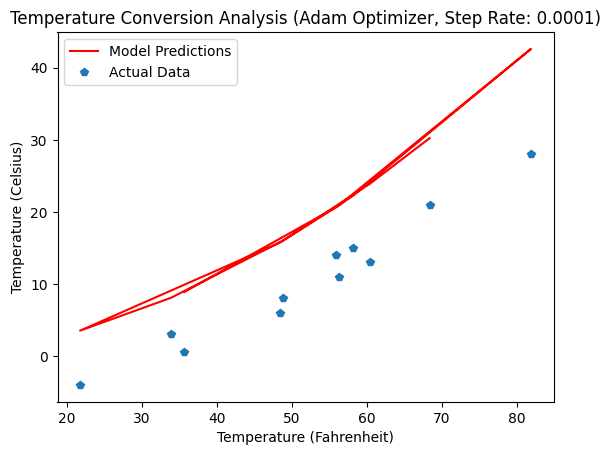

In [15]:
temperature_predictions = temperature_quadratic(normalized_temps, *weight_params)

plt.figure()
# Define temperature scale labels
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Display model's temperature conversion curve
plt.plot(temp_fahrenheit.numpy(), 
         temperature_predictions.detach().numpy(), 
         color='red', 
         label='Model Predictions')

# Show original temperature measurements
plt.plot(temp_fahrenheit.numpy(), 
         temp_celsius.numpy(), 
         'p', 
         label='Actual Data')

plt.title("Temperature Conversion Analysis (Adam Optimizer, Step Rate: 0.0001)")

# Include data identifiers
plt.legend()

# Display final visualization
plt.show()

In [16]:
preprocessed_data = 0.1 * temp_fahrenheit
theta_values = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
update_rate = 0.1
sgd_optimizer = optimization_tools.SGD([theta_values], lr=update_rate)

optimize_parameters(
    total_iterations=5000,
    optimization_method=sgd_optimizer,
    model_parameters=theta_values,
    input_data=preprocessed_data,
    target_values=temp_celsius)

Iteration 1, error 675.7944
Iteration 500, error nan
Iteration 1000, error nan
Iteration 1500, error nan
Iteration 2000, error nan
Iteration 2500, error nan
Iteration 3000, error nan
Iteration 3500, error nan
Iteration 4000, error nan
Iteration 4500, error nan
Iteration 5000, error nan


tensor([nan, nan, nan], requires_grad=True)

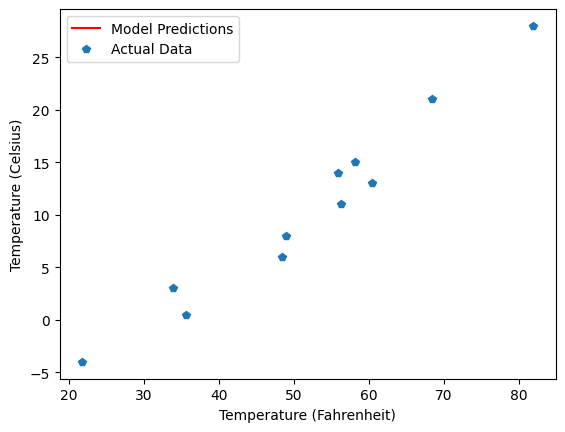

In [17]:
model_estimations = temperature_quadratic(preprocessed_data, *theta_values)

plt.figure()
# Set up temperature scale indicators
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Visualize the predicted temperature relationship
plt.plot(temp_fahrenheit.numpy(), 
         model_estimations.detach().numpy(), 
         color='red', 
         label='Model Predictions')

# Display actual temperature pairs
plt.plot(temp_fahrenheit.numpy(), 
         temp_celsius.numpy(), 
         'p', 
         label='Actual Data')

# Show data description
plt.legend()

# Present the visualization
plt.show()

In [18]:
raw_temperatures = temp_fahrenheit
model_variables = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
micro_step = 0.00000001
gradient_descent = optimization_tools.SGD([model_variables], lr=micro_step)

optimize_parameters(
    total_iterations=5000,
    optimization_method=gradient_descent,
    model_parameters=model_variables,
    input_data=raw_temperatures,
    target_values=temp_celsius)

Iteration 1, error 11709471.0000
Iteration 500, error 203.5310
Iteration 1000, error 202.9296
Iteration 1500, error 202.3291
Iteration 2000, error 201.7295
Iteration 2500, error 201.1309
Iteration 3000, error 200.5331
Iteration 3500, error 199.9362
Iteration 4000, error 199.3402
Iteration 4500, error 198.7452
Iteration 5000, error 198.1511


tensor([ 9.6692e-01, -1.1139e-02, -9.4794e-04], requires_grad=True)

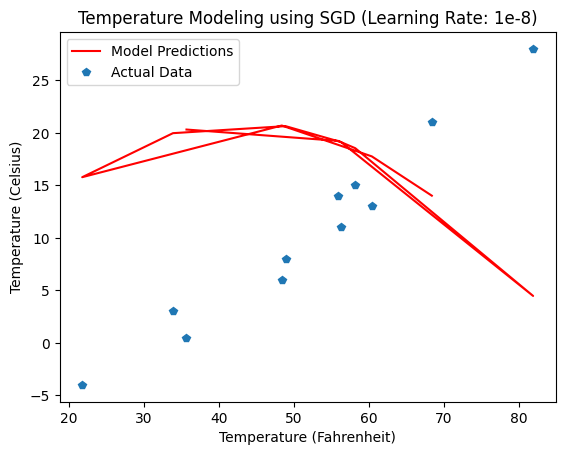

In [19]:
computed_values = temperature_quadratic(raw_temperatures, *model_variables)

plt.figure()
# Define measurement scales
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Plot predicted temperature conversion curve
plt.plot(temp_fahrenheit.numpy(), 
         computed_values.detach().numpy(), 
         color='red', 
         label='Model Predictions')

# Plot measured temperature points
plt.plot(temp_fahrenheit.numpy(), 
         temp_celsius.numpy(), 
         'p', 
         label='Actual Data')

plt.title("Temperature Modeling using SGD (Learning Rate: 1e-8)")

# Display measurement labels
plt.legend()

# Show temperature analysis
plt.show()

Problem - 2

In [20]:
input_features = temp_fahrenheit
weight_tensor = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_factor = 0.00001
sgd_trainer = optimization_tools.SGD([weight_tensor], lr=learning_factor)

optimize_parameters(
    total_iterations=5000,
    optimization_method=sgd_trainer,
    model_parameters=weight_tensor,
    input_data=input_features,
    target_values=temp_celsius)

Iteration 1, error 11709471.0000
Iteration 500, error nan
Iteration 1000, error nan
Iteration 1500, error nan
Iteration 2000, error nan
Iteration 2500, error nan
Iteration 3000, error nan
Iteration 3500, error nan
Iteration 4000, error nan
Iteration 4500, error nan
Iteration 5000, error nan


tensor([nan, nan, nan], requires_grad=True)

In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
np.random.seed(0)

In [22]:
# Define the source location for housing data
data_source = 'Housing.csv'

# Load housing information into a structured format
housing_data = pd.read_csv(data_source)

# Preview initial records from the dataset
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [23]:
# Define predictive attributes for house pricing
predictor_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Specify target variable for prediction
target_variable = 'price'

In [24]:
# Initialize scalers for features and target
feature_normalizer = MinMaxScaler()
target_normalizer = MinMaxScaler()

# Normalize predictor variables to a common scale
housing_data[predictor_columns] = feature_normalizer.fit_transform(housing_data[predictor_columns])

# Scale target variable to comparable range
housing_data[[target_variable]] = target_normalizer.fit_transform(housing_data[[target_variable]])

In [25]:
# Display initial records of transformed housing data
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,yes,no,no,no,yes,0.666667,yes,furnished
1,0.909091,0.502405,0.6,1.000000,1.000000,yes,no,no,no,yes,1.000000,no,furnished
2,0.909091,0.571134,0.4,0.333333,0.333333,yes,no,yes,no,no,0.666667,yes,semi-furnished
3,0.906061,0.402062,0.6,0.333333,0.333333,yes,no,yes,no,yes,1.000000,yes,furnished
4,0.836364,0.396564,0.6,0.000000,0.333333,yes,yes,yes,no,yes,0.666667,no,furnished


In [26]:
# Extract normalized feature array for model training
feature_matrix = housing_data[predictor_columns].values

# Convert target prices to numpy array format
target_values = housing_data[[target_variable]].values

In [27]:
def compute_linear_prediction(features, weights, bias):
    """
    Calculates linear prediction using weighted sum of features plus bias
    
    Args:
        features: Input feature tensor
        weights: Weight coefficients for each feature
        bias: Bias term to be added
        
    Returns:
        Predicted values using linear combination
    """
    return torch.sum(features * weights, dim=1) + bias

In [28]:
def optimize_model_parameters(max_iterations, parameter_optimizer, feature_weights, 
                            feature_bias, train_features, validation_features, 
                            train_targets, validation_targets):
    """
    Performs iterative training to optimize model parameters using training and validation data
    
    Args:
        max_iterations: Number of training iterations
        parameter_optimizer: Optimization algorithm instance
        feature_weights: Initial weights for features
        feature_bias: Initial bias term
        train_features: Training set features
        validation_features: Validation set features
        train_targets: Training set target values
        validation_targets: Validation set target values
        
    Returns:
        Tuple of optimized weights, bias, training loss history, validation loss history
    """
    train_loss_history = []
    validation_loss_history = []
    
    for iteration in range(1, max_iterations + 1):
        # Compute predictions and losses
        train_predictions = compute_linear_prediction(train_features, feature_weights, feature_bias)
        training_error = calculate_mse(train_predictions, train_targets)
        
        validation_predictions = compute_linear_prediction(train_features, feature_weights, feature_bias)
        validation_error = calculate_mse(validation_predictions, validation_targets)
        
        # Perform optimization step
        parameter_optimizer.zero_grad()
        training_error.backward()
        parameter_optimizer.step()
        
        # Record losses at intervals
        if iteration % 500 == 0:
            train_loss_history.append(training_error)
            validation_loss_history.append(validation_error)
            print(f"Iteration {iteration}, Training error {training_error.item():.4f},"
                  f" Validation error {validation_error.item():.4f}")
    
    return feature_weights, feature_bias, train_loss_history, validation_loss_history

In [29]:
def initialize_and_train_model(feature_data, target_data, iteration_count, optimizer_type, learning_step):
    """
    Sets up and executes model training with specified configuration
    
    Args:
        feature_data: Input features array
        target_data: Target values array
        iteration_count: Number of training iterations
        optimizer_type: Type of optimizer ('SGD' or 'ADAM')
        learning_step: Learning rate for optimization
        
    Returns:
        Tuple of optimized weights, bias, training and validation loss histories
    """
    # Split data into training and validation sets
    train_features, val_features, train_targets, val_targets = train_test_split(
        feature_data, target_data, test_size=0.2, random_state=42
    )
    
    # Convert data to PyTorch tensors
    train_features_tensor = torch.tensor(train_features)
    train_targets_tensor = torch.tensor(train_targets)
    val_features_tensor = torch.tensor(val_features)
    val_targets_tensor = torch.tensor(val_targets)
    
    # Initialize model parameters
    feature_count = feature_data.shape[1]
    weight_parameters = torch.tensor([1.0] * feature_count, requires_grad=True)
    bias_parameter = torch.tensor([0.0], requires_grad=True)
    
    # Configure optimizer
    if optimizer_type == 'SGD':
        parameter_optimizer = optimization_tools.SGD(
            [weight_parameters, bias_parameter], 
            lr=learning_step
        )
    elif optimizer_type == 'ADAM':
        parameter_optimizer = optimization_tools.Adam(
            [weight_parameters, bias_parameter], 
            lr=learning_step
        )
    
    # Execute training process
    optimized_weights, optimized_bias, training_history, validation_history = optimize_model_parameters(
        max_iterations=iteration_count,
        parameter_optimizer=parameter_optimizer,
        feature_weights=weight_parameters,
        feature_bias=bias_parameter,
        train_features=train_features_tensor,
        validation_features=val_features_tensor,
        train_targets=train_targets_tensor,
        validation_targets=val_targets_tensor
    )
    
    return optimized_weights, optimized_bias, training_history, validation_history

In [30]:
# Train model with Adam optimizer using learning rate 0.1
adam_weights_high, adam_bias_high, adam_train_losses_high, adam_val_losses_high = initialize_and_train_model(
    feature_matrix, 
    target_values, 
    iteration_count=5000,
    optimizer_type='ADAM',
    learning_step=0.1
)

Iteration 500, Training error 0.0231, Validation error 0.0386
Iteration 1000, Training error 0.0231, Validation error 0.0386
Iteration 1500, Training error 0.0231, Validation error 0.0386
Iteration 2000, Training error 0.0231, Validation error 0.0386
Iteration 2500, Training error 0.0231, Validation error 0.0386
Iteration 3000, Training error 0.0231, Validation error 0.0386
Iteration 3500, Training error 0.0231, Validation error 0.0386
Iteration 4000, Training error 0.0231, Validation error 0.0386
Iteration 4500, Training error 0.0231, Validation error 0.0386
Iteration 5000, Training error 0.0231, Validation error 0.0386


In [31]:
# Display parameters from previous Adam training (lr=0.1)
print(adam_weights_high, adam_bias_high)

# Train with Adam optimizer (lr=0.01)
adam_weights_med, adam_bias_med, adam_train_losses_med, adam_val_losses_med = initialize_and_train_model(
    feature_matrix, target_values, iteration_count=5000, optimizer_type='ADAM', learning_step=0.01)
print(adam_weights_med, adam_bias_med)

# Train with Adam optimizer (lr=0.001)
adam_weights_low, adam_bias_low, adam_train_losses_low, adam_val_losses_low = initialize_and_train_model(
    feature_matrix, target_values, iteration_count=5000, optimizer_type='ADAM', learning_step=0.001)
print(adam_weights_low, adam_bias_low)

# Train with Adam optimizer (lr=0.0001)
adam_weights_vlow, adam_bias_vlow, adam_train_losses_vlow, adam_val_losses_vlow = initialize_and_train_model(
    feature_matrix, target_values, iteration_count=5000, optimizer_type='ADAM', learning_step=0.0001)
print(adam_weights_vlow, adam_bias_vlow)

# Train with SGD optimizer (lr=0.1)
sgd_weights_high, sgd_bias_high, sgd_train_losses_high, sgd_val_losses_high = initialize_and_train_model(
    feature_matrix, target_values, iteration_count=5000, optimizer_type='SGD', learning_step=0.1)
print(sgd_weights_high, sgd_bias_high)

# Train with SGD optimizer (lr=0.01)
sgd_weights_med, sgd_bias_med, sgd_train_losses_med, sgd_val_losses_med = initialize_and_train_model(
    feature_matrix, target_values, iteration_count=5000, optimizer_type='SGD', learning_step=0.01)
print(sgd_weights_med, sgd_bias_med)

# Train with SGD optimizer (lr=0.001)
sgd_weights_low, sgd_bias_low, sgd_train_losses_low, sgd_val_losses_low = initialize_and_train_model(
    feature_matrix, target_values, iteration_count=5000, optimizer_type='SGD', learning_step=0.001)
print(sgd_weights_low, sgd_bias_low)

# Train with SGD optimizer (lr=0.0001)
sgd_weights_vlow, sgd_bias_vlow, sgd_train_losses_vlow, sgd_val_losses_vlow = initialize_and_train_model(
    feature_matrix, target_values, iteration_count=5000, optimizer_type='SGD', learning_step=0.0001)
print(sgd_weights_vlow, sgd_bias_vlow)

# Generate epoch numbers for plotting
iteration_points = range(1, 500 * len(sgd_train_losses_high), 500)

tensor([4.3523e-06, 4.4021e-06, 4.0123e-06, 4.2044e-06, 4.1834e-06],
       requires_grad=True) tensor([0.2560], requires_grad=True)
Iteration 500, Training error 0.0266, Validation error 0.0424
Iteration 1000, Training error 0.0234, Validation error 0.0389
Iteration 1500, Training error 0.0231, Validation error 0.0386
Iteration 2000, Training error 0.0231, Validation error 0.0386
Iteration 2500, Training error 0.0231, Validation error 0.0386
Iteration 3000, Training error 0.0231, Validation error 0.0386
Iteration 3500, Training error 0.0231, Validation error 0.0386
Iteration 4000, Training error 0.0231, Validation error 0.0386
Iteration 4500, Training error 0.0231, Validation error 0.0386
Iteration 5000, Training error 0.0231, Validation error 0.0386
tensor([ 1.1828e-07,  2.5502e-07, -6.8351e-08, -2.1430e-09,  6.7796e-09],
       requires_grad=True) tensor([0.2560], requires_grad=True)
Iteration 500, Training error 0.2047, Validation error 0.2117
Iteration 1000, Training error 0.1061,

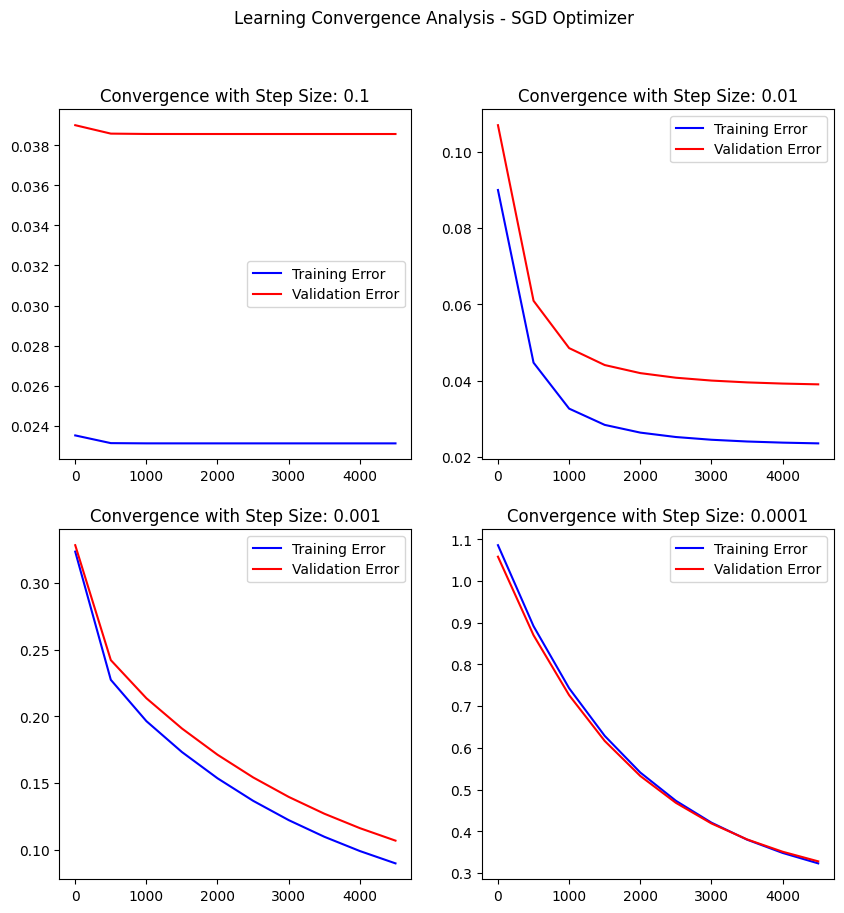

In [32]:
plt.figure(figsize=(10, 10))
plt.suptitle('Learning Convergence Analysis - SGD Optimizer')

# Plot for high learning rate (0.1)
plt.subplot(2, 2, 1)
plt.plot(iteration_points, 
         np.array([item.detach().item() for item in sgd_train_losses_high]), 
         color='blue', 
         label='Training Error')
plt.plot(iteration_points, 
         np.array([item.detach().item() for item in sgd_val_losses_high]), 
         color='red', 
         label='Validation Error')
plt.title('Convergence with Step Size: 0.1')
plt.legend()

# Plot for medium learning rate (0.01)
plt.subplot(2, 2, 2)
plt.plot(iteration_points, 
         np.array([item.detach().item() for item in sgd_train_losses_med]), 
         color='blue', 
         label='Training Error')
plt.plot(iteration_points, 
         np.array([item.detach().item() for item in sgd_val_losses_med]), 
         color='red', 
         label='Validation Error')
plt.title('Convergence with Step Size: 0.01')
plt.legend()

# Plot for low learning rate (0.001)
plt.subplot(2, 2, 3)
plt.plot(iteration_points, 
         np.array([item.detach().item() for item in sgd_train_losses_low]), 
         color='blue', 
         label='Training Error')
plt.plot(iteration_points, 
         np.array([item.detach().item() for item in sgd_val_losses_low]), 
         color='red', 
         label='Validation Error')
plt.title('Convergence with Step Size: 0.001')
plt.legend()

# Plot for very low learning rate (0.0001)
plt.subplot(2, 2, 4)
plt.plot(iteration_points, 
         np.array([item.detach().item() for item in sgd_train_losses_vlow]), 
         color='blue', 
         label='Training Error')
plt.plot(iteration_points, 
         np.array([item.detach().item() for item in sgd_val_losses_vlow]), 
         color='red', 
         label='Validation Error')
plt.title('Convergence with Step Size: 0.0001')
plt.legend()

plt.show()

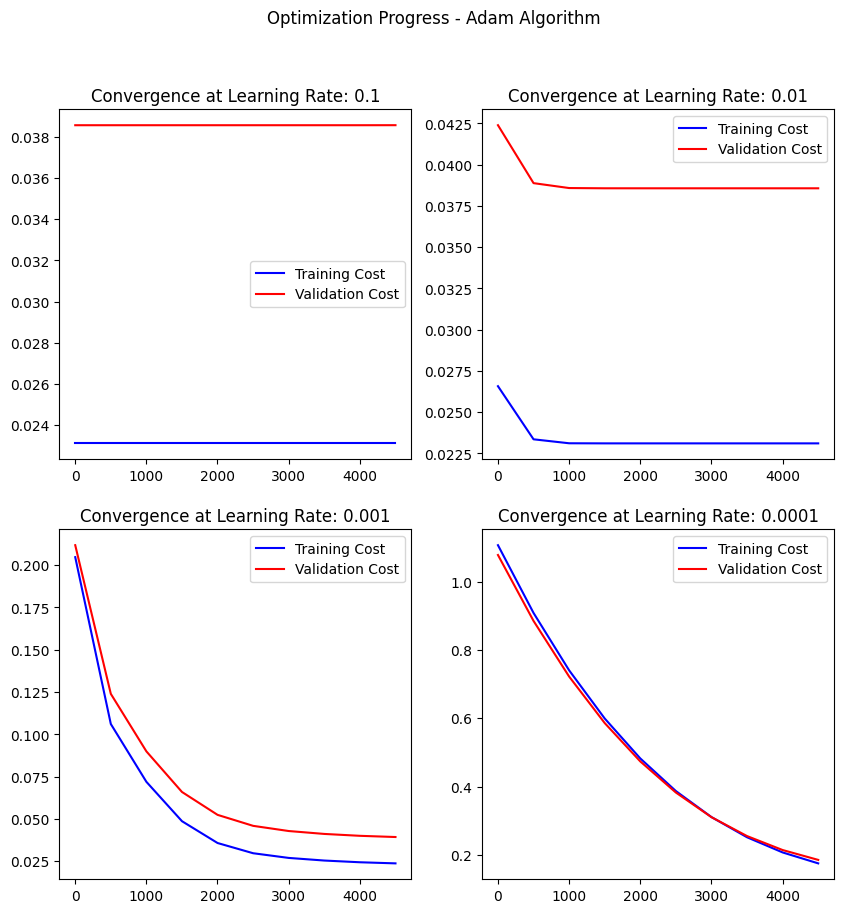

In [33]:
plt.figure(figsize=(10, 10))
plt.suptitle('Optimization Progress - Adam Algorithm')

# Visualize high learning rate performance (0.1)
plt.subplot(2, 2, 1)
plt.plot(iteration_points, 
         np.array([item.detach().item() for item in adam_train_losses_high]), 
         color='blue', 
         label='Training Cost')
plt.plot(iteration_points, 
         np.array([item.detach().item() for item in adam_val_losses_high]), 
         color='red', 
         label='Validation Cost')
plt.title('Convergence at Learning Rate: 0.1')
plt.legend()

# Visualize medium learning rate performance (0.01)
plt.subplot(2, 2, 2)
plt.plot(iteration_points, 
         np.array([item.detach().item() for item in adam_train_losses_med]), 
         color='blue', 
         label='Training Cost')
plt.plot(iteration_points, 
         np.array([item.detach().item() for item in adam_val_losses_med]), 
         color='red', 
         label='Validation Cost')
plt.title('Convergence at Learning Rate: 0.01')
plt.legend()

# Visualize low learning rate performance (0.001)
plt.subplot(2, 2, 3)
plt.plot(iteration_points, 
         np.array([item.detach().item() for item in adam_train_losses_low]), 
         color='blue', 
         label='Training Cost')
plt.plot(iteration_points, 
         np.array([item.detach().item() for item in adam_val_losses_low]), 
         color='red', 
         label='Validation Cost')
plt.title('Convergence at Learning Rate: 0.001')
plt.legend()

# Visualize very low learning rate performance (0.0001)
plt.subplot(2, 2, 4)
plt.plot(iteration_points, 
         np.array([item.detach().item() for item in adam_train_losses_vlow]), 
         color='blue', 
         label='Training Cost')
plt.plot(iteration_points, 
         np.array([item.detach().item() for item in adam_val_losses_vlow]), 
         color='red', 
         label='Validation Cost')
plt.title('Convergence at Learning Rate: 0.0001')
plt.legend()

plt.show()

Problem - 3

In [34]:
# Define data source location for housing information
housing_source = 'Housing.csv'

# Load housing dataset into pandas framework
property_data = pd.read_csv(housing_source)

# Preview initial entries of housing dataset
property_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [35]:
# Analyze distribution of furnishing types
property_data['furnishingstatus'].value_counts().unique

<bound method Series.unique of furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64>

In [36]:
# Create binary indicators for furnishing categories
property_data = pd.get_dummies(property_data, 
                              columns=['furnishingstatus'], 
                              drop_first=False)

# Remove redundant semi-furnished column to avoid multicollinearity
property_data = property_data.drop('furnishingstatus_semi-furnished', axis=1)

In [37]:
# Display initial rows of transformed housing data
property_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,True,False
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,True,False
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,False,False
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,True,False
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,True,False


In [38]:
# Identify columns containing categorical data
categorical_features = property_data.select_dtypes(include=['object']).columns
# Display identified categorical columns
categorical_features

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea'],
      dtype='object')

In [39]:
# Convert yes/no responses to binary values (1/0)
property_data[categorical_features] = property_data[categorical_features].apply(
    lambda x: x.map({'yes': 1, 'no': 0})
)

In [40]:
# Display dataset structure and data types
property_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   price                         545 non-null    int64
 1   area                          545 non-null    int64
 2   bedrooms                      545 non-null    int64
 3   bathrooms                     545 non-null    int64
 4   stories                       545 non-null    int64
 5   mainroad                      545 non-null    int64
 6   guestroom                     545 non-null    int64
 7   basement                      545 non-null    int64
 8   hotwaterheating               545 non-null    int64
 9   airconditioning               545 non-null    int64
 10  parking                       545 non-null    int64
 11  prefarea                      545 non-null    int64
 12  furnishingstatus_furnished    545 non-null    bool 
 13  furnishingstatus_unfurnished  545 n

In [41]:
# Initialize scalers for feature normalization
feature_normalizer = MinMaxScaler()
target_normalizer = MinMaxScaler()



In [42]:
# Separate features and target variable
input_features = property_data.drop('price', axis=1)
target_prices = property_data[['price']]



In [43]:
# Normalize features and convert to numpy array
normalized_features = pd.DataFrame(
    feature_normalizer.fit_transform(input_features), 
    columns=input_features.columns, 
    index=input_features.index
).values

# Scale target prices and convert to numpy array
normalized_prices = pd.DataFrame(
    target_normalizer.fit_transform(target_prices), 
    columns=target_prices.columns, 
    index=target_prices.index
).values



In [44]:
# Train model using Adam optimizer with high learning rate
adam_weights_high, adam_bias_high, adam_train_losses_high, adam_val_losses_high = initialize_and_train_model(
    feature_data=normalized_features,
    target_data=normalized_prices,
    iteration_count=5000,
    optimizer_type='ADAM',
    learning_step=0.1
)


Iteration 500, Training error 0.0231, Validation error 0.0386
Iteration 1000, Training error 0.0231, Validation error 0.0386
Iteration 1500, Training error 0.0231, Validation error 0.0386
Iteration 2000, Training error 0.0231, Validation error 0.0386
Iteration 2500, Training error 0.0231, Validation error 0.0386
Iteration 3000, Training error 0.0231, Validation error 0.0386
Iteration 3500, Training error 0.0231, Validation error 0.0386
Iteration 4000, Training error 0.0231, Validation error 0.0386
Iteration 4500, Training error 0.0231, Validation error 0.0386
Iteration 5000, Training error 0.0231, Validation error 0.0386


In [45]:
print(adam_weights_high, adam_bias_high)



tensor([ 5.4853e-09,  2.0843e-08, -4.5936e-09, -6.5771e-10,  7.4842e-09,
        -3.9867e-10,  1.4340e-09,  1.3484e-09, -2.6016e-10, -1.4452e-10,
        -9.6614e-10,  1.5285e-09,  3.6333e-09], requires_grad=True) tensor([0.2560], requires_grad=True)


In [46]:
# Train model with medium learning rate
adam_weights_med, adam_bias_med, adam_train_losses_med, adam_val_losses_med = initialize_and_train_model(
   feature_data=normalized_features,
   target_data=normalized_prices, 
   iteration_count=5000,
   optimizer_type='ADAM',
   learning_step=0.01
)


Iteration 500, Training error 0.0605, Validation error 0.0784
Iteration 1000, Training error 0.0353, Validation error 0.0518
Iteration 1500, Training error 0.0273, Validation error 0.0433
Iteration 2000, Training error 0.0244, Validation error 0.0401
Iteration 2500, Training error 0.0234, Validation error 0.0390
Iteration 3000, Training error 0.0232, Validation error 0.0387
Iteration 3500, Training error 0.0231, Validation error 0.0386
Iteration 4000, Training error 0.0231, Validation error 0.0386
Iteration 4500, Training error 0.0231, Validation error 0.0386
Iteration 5000, Training error 0.0231, Validation error 0.0386


In [47]:
print(adam_weights_med, adam_bias_med)



tensor([-2.0866e-07,  4.0596e-05, -1.0004e-05, -6.8162e-06,  6.8431e-06,
         1.9621e-07, -6.6898e-07,  8.3814e-07, -1.6544e-08, -1.2367e-06,
        -1.3017e-06,  1.0794e-06,  2.2106e-06], requires_grad=True) tensor([0.2560], requires_grad=True)


In [48]:
# Train model with low learning rate 
adam_weights_low, adam_bias_low, adam_train_losses_low, adam_val_losses_low = initialize_and_train_model(
   feature_data=normalized_features,
   target_data=normalized_prices,
   iteration_count=5000, 
   optimizer_type='ADAM',
   learning_step=0.001
)


Iteration 500, Training error 3.1856, Validation error 3.1219
Iteration 1000, Training error 0.4633, Validation error 0.4578
Iteration 1500, Training error 0.1503, Validation error 0.1660
Iteration 2000, Training error 0.1138, Validation error 0.1334
Iteration 2500, Training error 0.0929, Validation error 0.1122
Iteration 3000, Training error 0.0768, Validation error 0.0955
Iteration 3500, Training error 0.0642, Validation error 0.0824
Iteration 4000, Training error 0.0545, Validation error 0.0721
Iteration 4500, Training error 0.0469, Validation error 0.0641
Iteration 5000, Training error 0.0408, Validation error 0.0577


In [49]:
print(adam_weights_low, adam_bias_low)



tensor([ 0.2128,  0.4137, -0.0796,  0.0596,  0.2615, -0.0317,  0.0713,  0.0340,
        -0.0295,  0.0121, -0.0393,  0.0504,  0.1279], requires_grad=True) tensor([-0.2757], requires_grad=True)


In [50]:
adam_weights_vlow, adam_bias_vlow, adam_train_losses_vlow, adam_val_losses_vlow = initialize_and_train_model(
   feature_data=normalized_features,
   target_data=normalized_prices,
   iteration_count=5000,
   optimizer_type='ADAM',
   learning_step=0.0001
)


Iteration 500, Training error 13.0457, Validation error 12.8904
Iteration 1000, Training error 11.3789, Validation error 11.2355
Iteration 1500, Training error 9.8671, Validation error 9.7352
Iteration 2000, Training error 8.4970, Validation error 8.3764
Iteration 2500, Training error 7.2580, Validation error 7.1485
Iteration 3000, Training error 6.1414, Validation error 6.0428
Iteration 3500, Training error 5.1404, Validation error 5.0523
Iteration 4000, Training error 4.2489, Validation error 4.1712
Iteration 4500, Training error 3.4619, Validation error 3.3943
Iteration 5000, Training error 2.7748, Validation error 2.7171


In [51]:
 #Display results from very low learning rate Adam training
print(adam_weights_vlow, adam_bias_vlow)


tensor([0.5580, 0.5592, 0.5553, 0.5571, 0.5588, 0.5530, 0.5554, 0.5571, 0.5542,
        0.5563, 0.5540, 0.5553, 0.5615], requires_grad=True) tensor([-0.4394], requires_grad=True)


In [52]:
# Train model using SGD with high learning rate
sgd_weights_high, sgd_bias_high, sgd_train_losses_high, sgd_val_losses_high = initialize_and_train_model(
   feature_data=normalized_features,
   target_data=normalized_prices,
   iteration_count=5000,
   optimizer_type='SGD', 
   learning_step=0.1
)


Iteration 500, Training error 0.0236, Validation error 0.0391
Iteration 1000, Training error 0.0231, Validation error 0.0386
Iteration 1500, Training error 0.0231, Validation error 0.0386
Iteration 2000, Training error 0.0231, Validation error 0.0386
Iteration 2500, Training error 0.0231, Validation error 0.0386
Iteration 3000, Training error 0.0231, Validation error 0.0386
Iteration 3500, Training error 0.0231, Validation error 0.0386
Iteration 4000, Training error 0.0231, Validation error 0.0386
Iteration 4500, Training error 0.0231, Validation error 0.0386
Iteration 5000, Training error 0.0231, Validation error 0.0386


In [53]:
print(sgd_weights_high, sgd_bias_high)


tensor([ 3.3234e-07,  2.1203e-06, -7.5498e-07, -1.5237e-07,  5.3786e-07,
        -1.4389e-08,  7.3909e-08,  1.0228e-07, -6.9081e-09, -1.0148e-08,
        -8.3590e-08,  1.0964e-07,  2.4538e-07], requires_grad=True) tensor([0.2560], requires_grad=True)


In [54]:
sgd_weights_med, sgd_bias_med, sgd_train_losses_med, sgd_val_losses_med = initialize_and_train_model(
   feature_data=normalized_features,
   target_data=normalized_prices,
   iteration_count=5000,
   optimizer_type='SGD',
   learning_step=0.01
)


Iteration 500, Training error 0.1272, Validation error 0.1449
Iteration 1000, Training error 0.0591, Validation error 0.0757
Iteration 1500, Training error 0.0386, Validation error 0.0547
Iteration 2000, Training error 0.0308, Validation error 0.0467
Iteration 2500, Training error 0.0274, Validation error 0.0431
Iteration 3000, Training error 0.0257, Validation error 0.0413
Iteration 3500, Training error 0.0247, Validation error 0.0403
Iteration 4000, Training error 0.0242, Validation error 0.0397
Iteration 4500, Training error 0.0238, Validation error 0.0394
Iteration 5000, Training error 0.0236, Validation error 0.0391


In [55]:
print(sgd_weights_med, sgd_bias_med)


tensor([ 0.0908,  0.1152,  0.0146, -0.0318,  0.0100, -0.0054, -0.0024,  0.0098,
        -0.0027, -0.0278, -0.0067,  0.0036,  0.0068], requires_grad=True) tensor([0.1933], requires_grad=True)


In [56]:
sgd_weights_low, sgd_bias_low, sgd_train_losses_low, sgd_val_losses_low = initialize_and_train_model(
   feature_data=normalized_features,
   target_data=normalized_prices,
   iteration_count=5000,
   optimizer_type='SGD',
   learning_step=0.001
)


Iteration 500, Training error 0.6403, Validation error 0.6492
Iteration 1000, Training error 0.4374, Validation error 0.4575
Iteration 1500, Training error 0.3470, Validation error 0.3671
Iteration 2000, Training error 0.2846, Validation error 0.3042
Iteration 2500, Training error 0.2396, Validation error 0.2586
Iteration 3000, Training error 0.2057, Validation error 0.2244
Iteration 3500, Training error 0.1794, Validation error 0.1977
Iteration 4000, Training error 0.1584, Validation error 0.1765
Iteration 4500, Training error 0.1413, Validation error 0.1591
Iteration 5000, Training error 0.1271, Validation error 0.1447


In [57]:
print(sgd_weights_low, sgd_bias_low)


tensor([ 0.5176,  0.4371,  0.5646,  0.2609,  0.0940,  0.0952,  0.0704,  0.6189,
        -0.0675,  0.2547,  0.0814,  0.1967,  0.4130], requires_grad=True) tensor([-0.5902], requires_grad=True)


In [58]:
sgd_weights_vlow, sgd_bias_vlow, sgd_train_losses_vlow, sgd_val_losses_vlow = initialize_and_train_model(
   feature_data=normalized_features,
   target_data=normalized_prices,
   iteration_count=5000,
   optimizer_type='SGD',
   learning_step=0.0001
)


Iteration 500, Training error 9.0245, Validation error 8.9016
Iteration 1000, Training error 5.5765, Validation error 5.4878
Iteration 1500, Training error 3.5477, Validation error 3.4850
Iteration 2000, Training error 2.3504, Validation error 2.3077
Iteration 2500, Training error 1.6407, Validation error 1.6132
Iteration 3000, Training error 1.2170, Validation error 1.2012
Iteration 3500, Training error 0.9612, Validation error 0.9542
Iteration 4000, Training error 0.8040, Validation error 0.8038
Iteration 4500, Training error 0.7050, Validation error 0.7099
Iteration 5000, Training error 0.6403, Validation error 0.6491


In [59]:
print(sgd_weights_vlow, sgd_bias_vlow)

tensor([ 0.6591,  0.4947,  0.8329,  0.5950, -0.0886,  0.5903,  0.3723,  0.9077,
         0.3949,  0.6206,  0.5298,  0.5412,  0.6495], requires_grad=True) tensor([-1.1368], requires_grad=True)


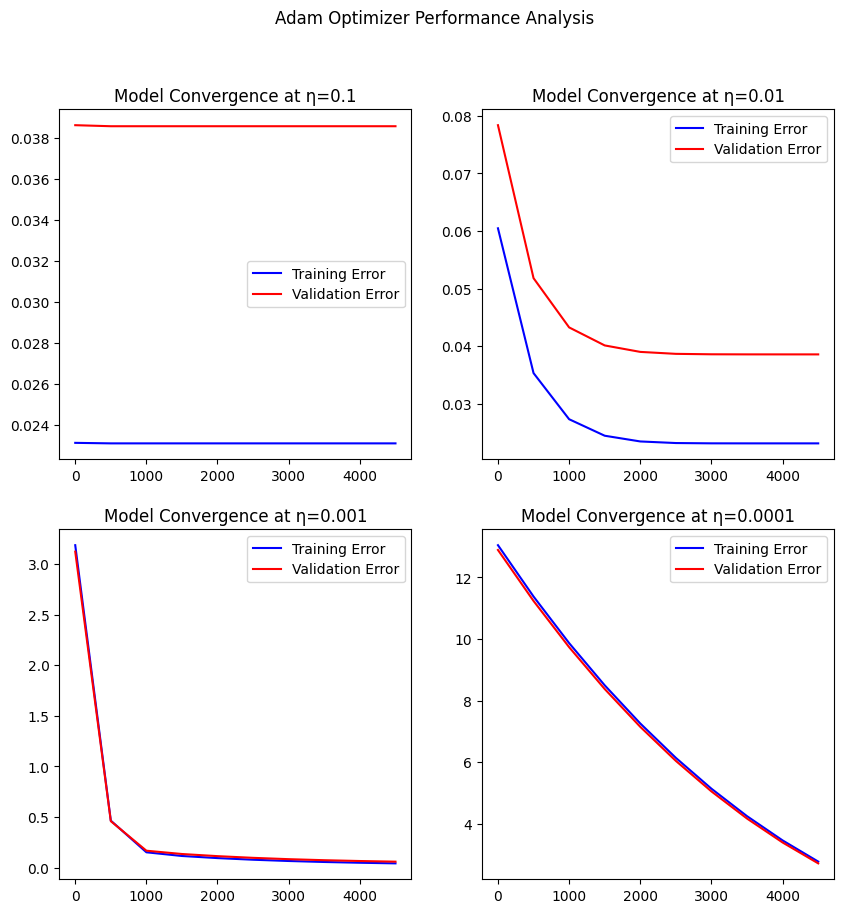

In [60]:
plt.figure(figsize=(10, 10))
plt.suptitle('Adam Optimizer Performance Analysis')

# Plot results with high learning rate (0.1)
plt.subplot(2, 2, 1)
plt.plot(iteration_points, 
        np.array([item.detach().item() for item in adam_train_losses_high]), 
        color='blue', 
        label='Training Error')
plt.plot(iteration_points, 
        np.array([item.detach().item() for item in adam_val_losses_high]), 
        color='red', 
        label='Validation Error')
plt.title('Model Convergence at η=0.1')
plt.legend()

# Plot results with medium learning rate (0.01)
plt.subplot(2, 2, 2)
plt.plot(iteration_points, 
        np.array([item.detach().item() for item in adam_train_losses_med]), 
        color='blue', 
        label='Training Error')
plt.plot(iteration_points, 
        np.array([item.detach().item() for item in adam_val_losses_med]), 
        color='red', 
        label='Validation Error')
plt.title('Model Convergence at η=0.01')
plt.legend()

# Plot results with low learning rate (0.001)
plt.subplot(2, 2, 3)
plt.plot(iteration_points, 
        np.array([item.detach().item() for item in adam_train_losses_low]), 
        color='blue', 
        label='Training Error')
plt.plot(iteration_points, 
        np.array([item.detach().item() for item in adam_val_losses_low]), 
        color='red', 
        label='Validation Error')
plt.title('Model Convergence at η=0.001')
plt.legend()

# Plot results with very low learning rate (0.0001)
plt.subplot(2, 2, 4)
plt.plot(iteration_points, 
        np.array([item.detach().item() for item in adam_train_losses_vlow]), 
        color='blue', 
        label='Training Error')
plt.plot(iteration_points, 
        np.array([item.detach().item() for item in adam_val_losses_vlow]), 
        color='red', 
        label='Validation Error')
plt.title('Model Convergence at η=0.0001')
plt.legend()

plt.show()

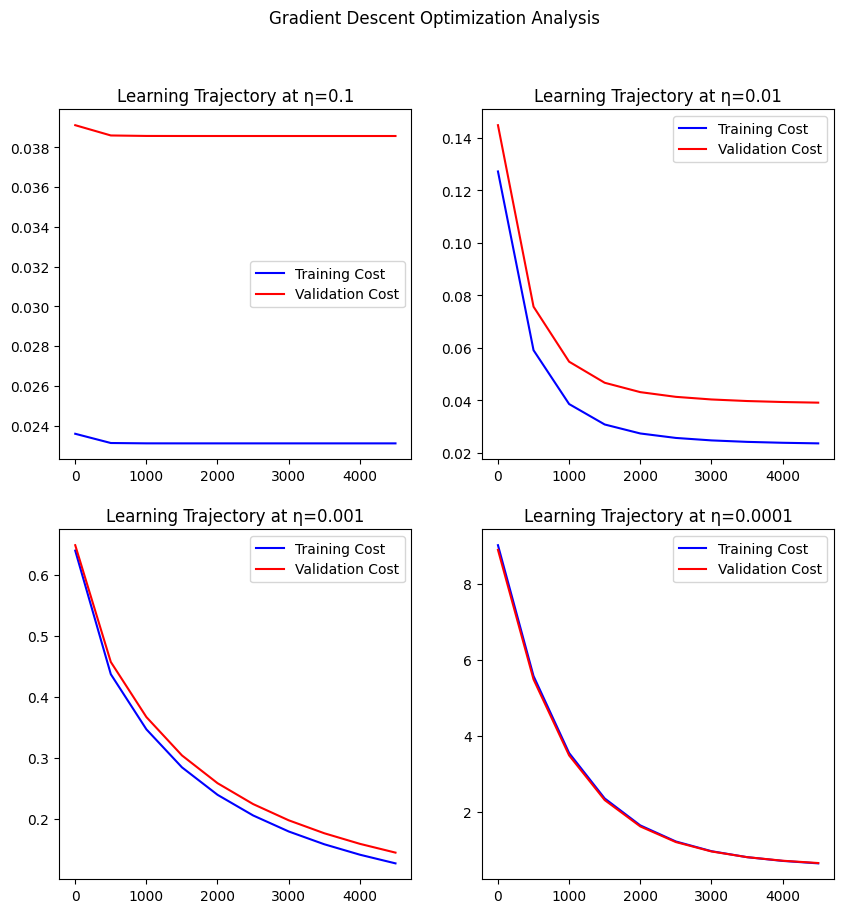

In [61]:
plt.figure(figsize=(10, 10))
plt.suptitle('Gradient Descent Optimization Analysis')

# Visualize high learning rate performance (0.1)
plt.subplot(2, 2, 1)
plt.plot(iteration_points, 
        np.array([item.detach().item() for item in sgd_train_losses_high]), 
        color='blue', 
        label='Training Cost')
plt.plot(iteration_points, 
        np.array([item.detach().item() for item in sgd_val_losses_high]), 
        color='red', 
        label='Validation Cost')
plt.title('Learning Trajectory at η=0.1')
plt.legend()

# Visualize medium learning rate performance (0.01)
plt.subplot(2, 2, 2)
plt.plot(iteration_points, 
        np.array([item.detach().item() for item in sgd_train_losses_med]), 
        color='blue', 
        label='Training Cost')
plt.plot(iteration_points, 
        np.array([item.detach().item() for item in sgd_val_losses_med]), 
        color='red', 
        label='Validation Cost')
plt.title('Learning Trajectory at η=0.01')
plt.legend()

# Visualize low learning rate performance (0.001)
plt.subplot(2, 2, 3)
plt.plot(iteration_points, 
        np.array([item.detach().item() for item in sgd_train_losses_low]), 
        color='blue', 
        label='Training Cost')
plt.plot(iteration_points, 
        np.array([item.detach().item() for item in sgd_val_losses_low]), 
        color='red', 
        label='Validation Cost')
plt.title('Learning Trajectory at η=0.001')
plt.legend()

# Visualize very low learning rate performance (0.0001)
plt.subplot(2, 2, 4)
plt.plot(iteration_points, 
        np.array([item.detach().item() for item in sgd_train_losses_vlow]), 
        color='blue', 
        label='Training Cost')
plt.plot(iteration_points, 
        np.array([item.detach().item() for item in sgd_val_losses_vlow]), 
        color='red', 
        label='Validation Cost')
plt.title('Learning Trajectory at η=0.0001')
plt.legend()

plt.show()